In [1]:

from IPython.display import display, Markdown, Latex
h1 = lambda x: display(Markdown('# '+str(x)))
h3 = lambda x: display(Markdown('### '+str(x)))
h4 = lambda x: display(Markdown('#### '+ (str(x).replace(' ','&nbsp;') if str(x) else 'None')))
h5 = lambda x: display(Markdown('##### '+ (str(x).replace(' ','&nbsp;') if str(x) else 'None')))
bl = lambda x: display(Markdown('##### <font color="blue"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
rd = lambda x: display(Markdown('##### <font color="red"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
rd1 = lambda x: display(Markdown('# <font color="red"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
gra = lambda x: display(Markdown('##### <font color="gray"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
itc = lambda x: display(Markdown('***'+str(x.strip()) + '***' ))
pl = lambda: print('\n'+'#'*100 + '\n')
pl2 = lambda: print('\n'+'='*100 + '\n')
pls = lambda: print('\n'+'#'*50 +' Start '+'#'*50 + '\n')
pn = lambda x=5: print('\n'*x)


## Hand Made Neural Network

https://144.34.140.210:8579/notebooks/Git_Qiliang/ML_ANN_Gradiant_Decent/Backpropagation.ipynb

In [67]:
import pdb
bp = pdb.set_trace

import random
import uuid
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [3]:
def relu(x):
    if x>0:
        return x
    else:
        return 0
# activation_func = np.vectorize(relu)  
activation_func = np.vectorize(lambda x: x) 
         
class Weight:
    def __init__(self,m,n):
        self.m = m
        self.n = n
        self.val = np.random.randn(m,n)
        self.normalize()
        
    def normalize(self):
        self.val = self.val/self.val.sum()

class Layer:
    def __init__(self,n,id=None):
        self.val = None
        self.id = id
        self.input_weight = None
        self.output_weight = None
        self.pre_layer = None
        self.next_layer = None
        self.n = n
        self.delta_weight = None
        
        
    def full_connect(self,other):
        m = self.n
        n = other.n
        weight = Weight(m,n)
        self.output_weight = weight
        other.input_weight = weight
        
        self.next_layer = other
        other.pre_layer = self
    
    def stats(self):
        print("n:",self.n)
        if self.output_weight:
            print('Weight:',self.output_weight.val.shape)
        print()
            
    def pull_in(self,input_list):
        self.val = np.array([input_list,])
        self.val = self.val/self.val.sum()
            
    def forwarding(self):
#         print(self.id,'forwarding')
        val = self.val.dot(self.output_weight.val)
        try:
            if self.next_layer:
                self.next_layer.val = activation_func(val)      
        except:
#             bp()
            raise
        
    def backwarding(self, error_term, learning_rate):
#         print(self.id,'backwarding')
        pre = self.pre_layer
        K1 = pre.output_weight.val
#         print(K1.shape)
        while(pre.pre_layer):
            pre = pre.pre_layer
            K1 = pre.output_weight.val.dot(K1)
            
        K1 = pre.val.dot(K1)
#         print('K1:',K1.shape)


        next_layer = self.next_layer
        if next_layer.output_weight:
            K2 = next_layer.output_weight.val
            while(next_layer.next_layer.output_weight):
                next_layer = next_layer.next_layer
                K2 = K2.dot(next_layer.output_weight.val) 
#             print("K2:",K2.shape)
        else:
            K2 = np.array([[1]])
            
            
#         return K1,K2
#         bp()
        derivative = K1.T.dot(K2.T)
#         print("Derivative:",derivative.shape)
#         return derivative
    
        delta_weight = learning_rate*(-1)*(error_term)*derivative
#         bp()
        if type(self.delta_weight)!=type(None):
            self.delta_weight += delta_weight
        else:
            self.delta_weight = delta_weight
    
    def update_weights(self):
        if type(self.delta_weight)!=type(None):
            self.output_weight.val += self.delta_weight
            self.delta_weight = None
    
class Network:
    def __init__(self,input_layer,output_layer):
        self.input_layer = input_layer
        self.output_layer = output_layer
        self.learning_rate = 0.01
        
    def set_learning_rate(self,rate):
        self.learning_rate = rate
        
              
    def batch_forwarding(self):
        cur = self.input_layer
        while(cur.next_layer):
            cur.forwarding()
            cur = cur.next_layer
             
    def get_error_term(self,ground_truth_list):      
        error = self.output_layer.val-ground_truth_list
        return error
    
    def batch_backwarding(self, error_term):
        cur = self.input_layer.next_layer
        while(cur and cur.output_weight):
            cur.backwarding(error_term, self.learning_rate)
            cur = cur.next_layer
            
    def one_train(self,x,y):
        input_layer.pull_in(x)
        self.batch_forwarding()
        error_term = self.get_error_term(y)
        self.batch_backwarding(error_term)
        
        
    def batch_update_weights(self):
        cur = self.input_layer.next_layer
        while(cur and cur.output_weight):
            cur.update_weights() 
            cur = cur.next_layer

    def batch_train(self,X,Y,batch_size=20):
        i=0
        for i,(x,y) in enumerate(zip(X,Y)):
            self.one_train(x,y)
            
#             print('l1:\n',l1.val)
# #             print('l2:\n',l2.val)
# #             print('l3:\n',l3.val)
#             print('l4:\n',l4.val)
#             pl()
            

            if i%batch_size==0:
                self.batch_update_weights()
        self.batch_update_weights()
        
        
    def predict(self,x):
        input_layer.pull_in(x)
        self.batch_forwarding()
        return self.output_layer.val
    
    
#     def save(self,model_dir='./model.json'):
#         res = []
#         cur = self.input_layer
#         while(cur.output_weight):
#             res.append(cur)
         
#     def load(self,model_dir='./model.json')
#         pass



# # Networks
# input_layer = Layer(10,'in')
# l1 = Layer(10,'l1')
# l2 = Layer(50,'l2')
# l3 = Layer(50,'l3')
# l4 = Layer(10,'l4')
# output_layer = Layer(1,'out')


# input_layer.full_connect(l1)
# l1.full_connect(l2)
# l2.full_connect(l3)
# l3.full_connect(l4)
# l4.full_connect(output_layer)

# x = random.choices(range(100), k=10)

# print(x)
# y = np.array([[1]])

# nk = Network(input_layer,output_layer)
# nk.one_train(x,y)



In [4]:
# Networks
input_layer = Layer(10,'in')
l1 = Layer(10,'l1')
l2 = Layer(50,'l2')
l3 = Layer(50,'l3')
l4 = Layer(10,'l4')
output_layer = Layer(1,'out')


input_layer.full_connect(l1)
l1.full_connect(l2)
l2.full_connect(l3)
l3.full_connect(l4)
l4.full_connect(output_layer)


nk = Network(input_layer,output_layer)

In [60]:
vector = [2, 24, 31, 81, 2, 76, 57, 81, 79, 76]
vector = np.array(vector)
vector = vector/vector.sum()

X = []
Y = []
Y_percise = []
# for i in range(10000):
# for i in range(100000):
for i in range(1000000):
    x = np.array(random.choices(range(100), k=10))
    x = x/x.sum()
    y_percise = x.dot(vector)
    y = y_percise + (random.random()-0.5)*0.05
#     y = x.dot(vector) + (random.random()-0.5)*0.01
#     y = x.dot(vector) + (random.random()-0.5)*0
    X.append(x)
    Y.append(y)
    Y_percise.append(y_percise)

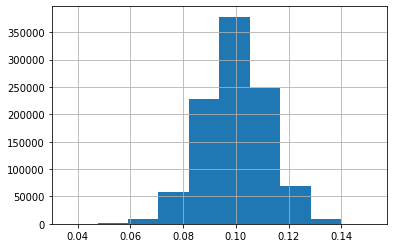

In [68]:
tmp = pd.DataFrame(Y_percise)
tmp[0].hist()
plt.show()

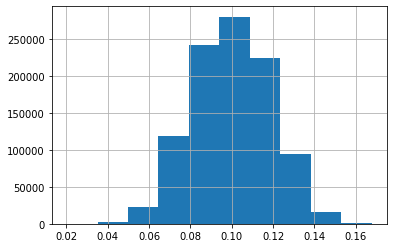

In [69]:
tmp = pd.DataFrame(Y)
tmp[0].hist()
plt.show()

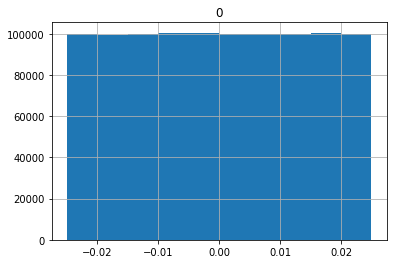

In [71]:
res = pd.DataFrame(Y) - pd.DataFrame(Y_percise)
res.hist()
plt.show()

In [ ]:
"""
均匀分布 

0.025 不可控的范围

"""

In [34]:
# nk.set_learning_rate(0.01)
nk.set_learning_rate(0.1)
# nk.set_learning_rate(1)
# nk.set_learning_rate(2)
nk.batch_train(X,Y)

In [72]:
x = np.array(random.choices(range(100), k=10))
x = x/x.sum()
y_percise = x.dot(vector) 
y_real = x.dot(vector) + (random.random()-0.5)*0.05
y_predict = nk.predict(x)

print('x:',x)
print('y_percise:',y_percise)
print('y_real:',y_real)
print('y_predict:',y_predict)

print('l1:\n',l1.val)
print('l4:\n',l4.val)
pl()

x: [0.03921569 0.05347594 0.0855615  0.09803922 0.04278075 0.05882353
 0.16934046 0.17647059 0.14795009 0.12834225]
y_percise: 0.12161135216722874
y_real: 0.1420376302499832
y_predict: [[0.12286998]]
l1:
 [[-0.03636677  0.05924002 -0.00505758  0.00685903  0.01424616 -0.03534752
  -0.00156582  0.06160459  0.00741395  0.00191213]]
l4:
 [[ 0.00026323  0.01705355 -0.03000602 -0.01479659  0.03648867  0.07250253
   0.03515803 -0.01180848  0.0247334   0.00806523]]

####################################################################################################



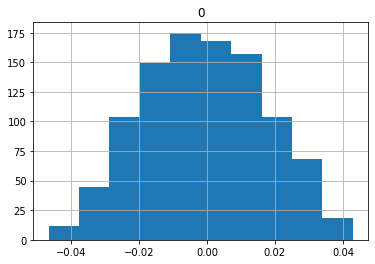

In [77]:
# Pred vs Real
res = []
for i in range(1000):
    x = np.array(random.choices(range(100), k=10))
    x = x/x.sum()
    y_percise = x.dot(vector) 
    y_real = x.dot(vector) + (random.random()-0.5)*0.05
    y_predict = nk.predict(x)
    res.append(y_predict[0][0]-y_real)

#     print('x:',x)
#     print('y_percise:',y_percise)
#     print('y_real:',y_real)
#     print('y_predict:',y_predict)

#     print('l1:\n',l1.val)
#     print('l4:\n',l4.val)
#     pl()
res = pd.DataFrame(res)
res.hist()
plt.show()

In [80]:
y_percise

0.09797604340703894

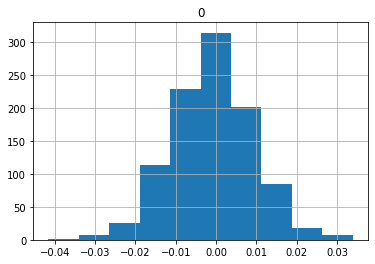

In [81]:
# Pred vs Percise
res = []
for i in range(1000):
    x = np.array(random.choices(range(100), k=10))
    x = x/x.sum()
    y_percise = x.dot(vector) 
    y_real = x.dot(vector) + (random.random()-0.5)*0.05
    y_predict = nk.predict(x)
    res.append(y_predict[0][0]-y_percise)

#     print('x:',x)
#     print('y_percise:',y_percise)
#     print('y_real:',y_real)
#     print('y_predict:',y_predict)

#     print('l1:\n',l1.val)
#     print('l4:\n',l4.val)
#     pl()
res = pd.DataFrame(res)
res.hist()
plt.show()

In [ ]:
"""

Looks Good
"""

## Notes

In [10]:
"""
生物神经会如何传导这些信号？   如何更新和记忆

线性到非线性

学习率很重要

最后能收敛和接近到什么样的程度

learning rate 0.01
without activation function

Seems can not be very accurate

理论上数据量足够大的时候应该收敛

去掉random试试  噪声


100万的数据

去除噪声后精度似乎也不是很高

看起来是没法收敛



学习率很重要的  可以收敛

1. 先扩大十倍数据集

    有效果，但效果 一般

2. 尝试0.01改变到1
    改变学习率很重要，再大量数据学习
    可以学到特别高的精度
    
3. 尝试学习率大于1
    1 -> 2
    结果看起来是学坏了
    
    学习率很重要   2在足够的数据下似乎也能学会
    
    来看下rate=2训练的结果是否能收敛    可以收敛
    
    换到1试试
    2->1
    
    差异感觉不大
    
    换到0.1试试
    1-> 0.1
    高精度可行
    
    换到0.01
    0.1->0.01
    感觉用处不大了
    
    
4. 下一步增加噪声试试
    rate=1
    似乎无法精确收敛
    
    5%-10%的误差
    
    改变rate试试
    rate=0.1
    似乎误差没有变小
    
    
    怎样去除这些随机噪声呢？
    
    相同输入数据的平均化  获得期望
    
    相近的点 融合和平滑
    
    
    干扰项影响
    
    记忆 统计猜测  统一
    现实是有干扰的
    
    
    先做一遍数据的聚类   PCA
    
    物理和信号处理中应该有方法   先放过
    
    傅里叶变换   很有可能可以  可以把内容拆开
    
    



增加功能  save and reload


"""

'\n生物神经会如何传导这些信号？   如何更新和记忆\n\n线性到非线性\n\n学习率很重要\n\n最后能收敛和接近到什么样的程度\n\nlearning rate 0.01\nwithout activation function\n\nSeems can not be very accurate\n\n\n'

In [70]:
"""

PCA  通过其他变量预测 另外的自变量

"""

SyntaxError: invalid character in identifier (<ipython-input-70-21f9f340c9eb>, line 1)

In [751]:
# nk.batch_train(X,Y)

In [93]:
l4.output_weight.val

array([[-0.19269106],
       [ 1.39741747],
       [ 1.04548973],
       [-0.20258485],
       [-1.95243922],
       [-0.34084244],
       [-0.39326694],
       [-1.07620167],
       [ 0.01801484],
       [ 1.91752749]])

In [74]:
l3.output_weight.val

array([[ 7.99489773e-02, -1.28883481e-01, -1.08758202e-01,
        -2.83299369e-01,  1.30403852e-01,  4.64624820e-02,
         8.49860513e-02, -8.26779228e-02,  4.03718589e-02,
        -4.94254108e-02],
       [ 1.28535677e-01,  1.92719495e-01, -1.67727969e-01,
         3.02950506e-01,  1.82792013e-01, -2.54098717e-02,
         8.58592590e-02,  1.74493863e-01, -1.65312083e-01,
        -1.15622542e-01],
       [-3.22899721e-01,  6.27529289e-04, -2.81818225e-02,
         2.34980358e-01, -9.53289463e-02, -1.41846785e-02,
        -3.38269723e-01, -2.10634137e-01,  1.13859656e-01,
        -4.16460248e-04],
       [ 6.62219881e-01,  6.42108937e-02,  8.98429328e-02,
        -1.31240825e-01, -4.08319459e-02,  4.94124012e-02,
         1.15341234e-01, -2.43517453e-01, -1.28914020e-01,
         3.01001457e-01],
       [ 6.84340166e-02,  8.86964974e-03, -2.96260648e-01,
        -1.24121282e-02, -1.78535662e-01, -9.22442151e-02,
         2.69662228e-01, -8.34643276e-03, -2.21792079e-01,
        -1.

In [75]:
l2.output_weight.val

array([[ 0.08510723, -0.01121689, -0.01802326, ..., -0.03507009,
         0.05629599,  0.00848492],
       [-0.02020317,  0.03367152,  0.00655599, ...,  0.0130693 ,
         0.03150085,  0.04805167],
       [ 0.00438371,  0.01148298,  0.00219288, ...,  0.00607755,
         0.05995458,  0.03074161],
       ...,
       [-0.00567585,  0.04768555, -0.00900835, ..., -0.0961654 ,
         0.04391923, -0.00955867],
       [-0.01522867,  0.01316334,  0.02044633, ..., -0.0189906 ,
         0.03178518,  0.02229477],
       [ 0.03394011,  0.02953836, -0.05973158, ..., -0.02565085,
        -0.06868927,  0.07607553]])

In [76]:
l1.output_weight.val

array([[-0.01605551, -0.10052804,  0.00152309,  0.18569246,  0.12513207,
         0.13026984,  0.09429307, -0.12387047,  0.13553875, -0.04172468,
         0.00646714, -0.13930396,  0.10786934,  0.14239545, -0.10888101,
         0.15701333,  0.08263467,  0.09804768, -0.34027071,  0.14594672,
         0.18086073,  0.0558452 ,  0.06015864, -0.10535668,  0.10818266,
         0.27277555,  0.05553154, -0.02210709, -0.07353723,  0.03661818,
        -0.10922774, -0.03277336,  0.07837544, -0.17448074, -0.02590112,
        -0.10449554, -0.18055676, -0.09745217,  0.1167623 ,  0.11761512,
         0.06978527, -0.13538102, -0.03521796, -0.06115944, -0.01217703,
        -0.08144725,  0.23943186, -0.25066258, -0.12022857,  0.08354386],
       [-0.0180743 , -0.23592704, -0.13231129, -0.03091949,  0.00159445,
         0.02342056,  0.04706227, -0.16184306,  0.03507666,  0.22523181,
         0.18300497, -0.06247585,  0.01097271,  0.08076567,  0.05436707,
        -0.24852148, -0.00296589, -0.08440308, -0.

In [190]:
l4.val

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [330]:
l3.val

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

In [ ]:
"""
如何设置可以使信号不至于消失？？？？

同时避免参数爆炸

可行的路径、重复感受和验证的，嫁接的方法

"""

In [223]:
nk.predict(x)

array([[0]])

In [214]:
l1.stats()
l2.stats()
l3.stats()
l4.stats()

n: 10
Weight: (10, 50)

n: 50
Weight: (50, 50)

n: 50
Weight: (50, 10)

n: 10
Weight: (10, 1)



In [215]:
print('input_layer:',[round(x,2) for x in input_layer.val[0]])
print('l1:',[round(x,2) for x in l1.val[0]])
print('l2:',[round(x,2) for x in l2.val[0]])
print('l3:',[round(x,2) for x in l3.val[0]])
print('l4:',[round(x,2) for x in l4.val[0]])
print('output_layer:',[round(x,2) for x in output_layer.val[0]])

input_layer: [85, 78, 24, 50, 51, 95, 1, 22, 51, 65]
l1: [24.03, 7.7, 37.9, 0.0, 45.19, 0.0, 82.94, 0.0, 0.0, 0.0]
l2: [2.99, 0.0, 3.95, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7, 0.0, 0.0, 6.15, 0.0, 12.57, 25.25, 15.12, 0.0, 0.0, 0.0, 11.79, 19.67, 28.17, 0.0, 5.11, 6.01, 0.0, 0.0, 2.56, 13.08, 35.02, 0.0, 3.71, 62.84, 28.64, 51.16, 0.54, 0.0, 33.64, 0.0, 19.34, 0.0, 0.0, 23.39, 15.72, 0.0, 0.52, 15.9, 0.0, 0.0, 20.21]
l3: [0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 3, 2, 0, 0, 0, 0, 0, 2]
l4: [0.57, 0.0, 0.0, 0.38, 0.0, 0.0, 0.0, 0.0, 0.3, 0.08]
output_layer: [0.15]


In [216]:
l1.delta_weight

array([[ 3.03586222e-04,  1.34174545e-04,  1.22835635e-03,
         7.51947139e-04,  2.10621331e-04, -2.25281513e-04,
         4.58187184e-04, -2.46946156e-04,  5.46989560e-04,
        -3.43687642e-04, -1.59704308e-03,  1.14776961e-04,
        -2.20332758e-04,  1.64067880e-03, -6.79567001e-05,
        -5.21673877e-04,  8.03791896e-04,  1.42830370e-03,
        -1.02715743e-04,  1.80930581e-04, -1.24633486e-03,
        -8.01996503e-04, -1.80922030e-04, -3.42926879e-04,
         1.10753069e-04,  7.04940749e-04,  9.13847454e-05,
        -9.89001596e-04,  3.15081050e-04,  7.34962703e-04,
        -1.31275881e-03,  1.44556152e-03, -1.49704793e-04,
         1.29837762e-03,  1.40979862e-03, -5.61983500e-04,
         9.43563031e-04, -6.12721008e-05,  6.11976414e-04,
        -7.71239116e-04,  7.29477931e-05,  9.56180302e-04,
        -4.16107126e-04,  9.52857139e-04,  5.78770502e-04,
         7.90586184e-04,  1.39235811e-03,  6.02323722e-04,
        -3.59216151e-04, -1.20803097e-04],
       [ 9.72

In [217]:
l2.delta_weight

array([[ 1.81545014e-03, -5.00561458e-03,  6.79693171e-03, ...,
        -5.55600742e-03, -4.51932771e-04,  1.76388167e-03],
       [-6.45120604e-03,  1.77874624e-02, -2.41529118e-02, ...,
         1.97432846e-02,  1.60594409e-03, -6.26795740e-03],
       [ 3.19865500e-03, -8.81942930e-03,  1.19755642e-02, ...,
        -9.78917051e-03, -7.96263687e-04,  3.10779615e-03],
       ...,
       [ 1.17568665e-04, -3.24163916e-04,  4.40169727e-04, ...,
        -3.59807391e-04, -2.92671948e-05,  1.14229089e-04],
       [-5.76694087e-03,  1.59007856e-02, -2.15910658e-02, ...,
         1.76491580e-02,  1.43560515e-03, -5.60312901e-03],
       [ 7.58638396e-03, -2.09174096e-02,  2.84029469e-02, ...,
        -2.32173855e-02, -1.88853192e-03,  7.37089022e-03]])

In [159]:
l1.stats()

n: 10


In [160]:
# l2.output_edges
l2.stats()

n: 50


In [37]:
l3.stats()

Num nodes: 50
Input Edges: 2500
Output Edges: 50


In [38]:
l4.stats()

Num nodes: 1
Input Edges: 50
Output Edges: 0
